# 📘 Notebook 1: Understanding Data Types in Python


This notebook introduces three fundamental data types used in panel data analysis:

1. **Cross-Sectional Data**
2. **Time-Series Data**
3. **Panel Data**

We use a synthetic dataset containing financial data of five Indian firms from 2015 to 2023. The dataset includes revenue, R&D spend, employee count, and profit.


## 🔹 Step 1: Load and Inspect the Dataset

In [1]:
# Import necessary libraries
import pandas as pd  # Imports the pandas library and assigns it the alias 'pd' for data manipulation and analysis.
import matplotlib.pyplot as plt # Imports the pyplot module from the matplotlib library for visualisations.

# Load the dataset
df = pd.read_csv("synthetic_indian_firms_panel_data.csv") # Reads data from the specified CSV file into a pandas DataFrame called 'df'.

# Convert important columns to numeric to avoid type issues during plotting
df['Revenue_Cr'] = pd.to_numeric(df['Revenue_Cr'], errors='coerce') # Converts the 'Revenue_Cr' column to a numeric
df['RD_Spend_Cr'] = pd.to_numeric(df['RD_Spend_Cr'], errors='coerce') # Converts the 'RD_Spend_Cr' column to a numeric
df['Employees'] = pd.to_numeric(df['Employees'], errors='coerce') # Converts the 'Employees' column to a numeric
df['Profit_Cr'] = pd.to_numeric(df['Profit_Cr'], errors='coerce') # Converts the 'Profit_Cr' column to a numeric

# Display first few rows of the dataset
df.head() # Displays the first five rows of the DataFrame 'df' to provide a quick overview of the data.

,Firm,Year,Revenue_Cr,RD_Spend_Cr,Employees,Profit_Cr
0,Tata,2015,25795.000000,1360.000000,46624,6355.856746
1,Tata,2016,27035.935025,1388.167938,49602,6661.621632
2,Tata,2017,30175.623068,1464.404549,47843,7435.236962
3,Tata,2018,29997.364272,1479.214781,49643,7391.314211
4,Tata,2019,29989.199169,1499.711555,48482,7389.302339


## 📊 2. Cross-Sectional Data
A snapshot of revenue for all firms in a single year (2023).

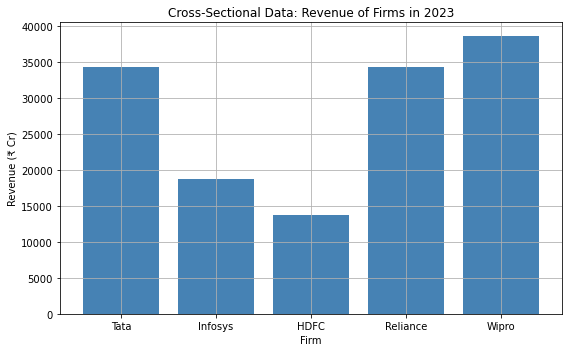

In [2]:
# Filter data for the year 2023
cross_section = df[df['Year'] == 2023] # Creates a new DataFrame 'cross_section' containing 
                                       # only rows where the 'Year' is 2023.

# Plot revenue for each firm as a bar chart
plt.figure(figsize=(8, 5)) # Creates a new figure for the plot with a specified size (8 inches by 5 inches)
plt.bar(cross_section["Firm"], cross_section["Revenue_Cr"], color='steelblue')  # Generates a bar chart with 'Firm' on the x-axis and 'Revenue_Cr' on the y-axis, using a steel blue color.
plt.title("Cross-Sectional Data: Revenue of Firms in 2023")  # Sets the title of the plot.
plt.ylabel("Revenue (₹ Cr)")  # Sets the label for the y-axis.
plt.xlabel("Firm")  # Sets the label for the x-axis.
plt.grid(True)  # Adds a grid to the plot for better readability.
plt.tight_layout()  # Adjusts plot parameters for a tight layout, preventing labels from overlapping.
plt.show() # Displays the generated plot.

## 📈 3. Time-Series Data
Tata’s revenue over time from 2015 to 2023.

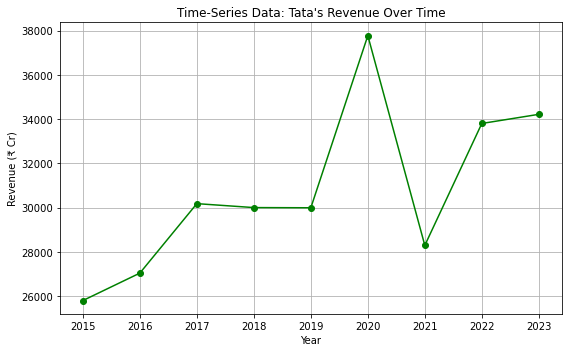

In [3]:
# Filter data for Tata and sort by year
tata_df = df[df['Firm'] == 'Tata'].sort_values("Year") # Creates 'tata_df' by selecting rows where 'Firm' is 'Tata', then sorts these rows by the 'Year' column.

# Extract year and revenue as numeric arrays
years = tata_df["Year"].values.astype(float) # Extracts the 'Year' column from 'tata_df', converts it to a NumPy array, and casts its data type to float.
revenues = tata_df["Revenue_Cr"].values.astype(float) # Extracts the 'Revenue_Cr' column from 'tata_df', converts it to a NumPy array, and casts its data type to float.

# Plot line graph for Tata's revenue trend
plt.figure(figsize=(8, 5)) # Creates a new figure for the plot with a specified size (8 inches by 5 inches)
plt.plot(years, revenues, marker="o", color="green")  # Plots a line graph with 'years' on the x-axis and 'revenues' on the y-axis, using circular markers and green color.
plt.title("Time-Series Data: Tata's Revenue Over Time") # Sets the title of the plot.
plt.xlabel("Year") # Sets the label for the x-axis.
plt.ylabel("Revenue (₹ Cr)") # Sets the label for the y-axis.
plt.grid(True) # Adds a grid to the plot for better readability.
plt.tight_layout() # Adjusts plot parameters to ensure all elements fit neatly within the figure area.
plt.show() # Displays the generated plot.

## 🧩 4. Panel Data
Revenue trends for all firms from 2015 to 2023.

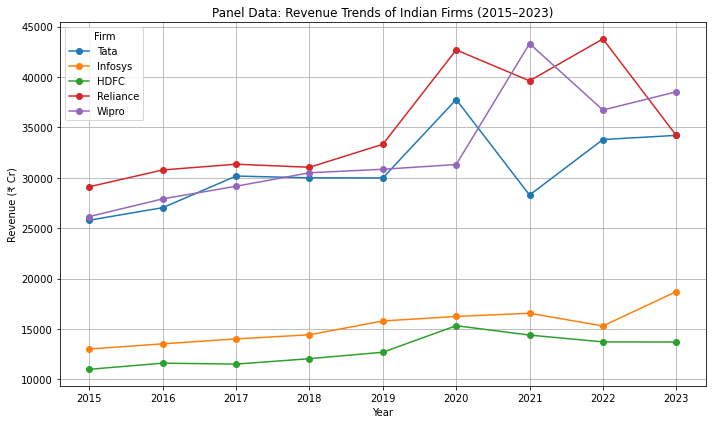

In [4]:
# Plot each firm's revenue trend on the same graph
plt.figure(figsize=(10, 6)) # Creates a new plot figure with a width of 10 inches and a height of 6 inches.
for firm in df['Firm'].unique(): # Loops through each unique firm name found in the 'Firm' column of the 'df' DataFrame.
    firm_data = df[df['Firm'] == firm].sort_values("Year") # Filters 'df' for data of the current 'firm' and sorts it by 'Year'.
    years = firm_data['Year'].values.astype(float) # Extracts the 'Year' column for the current firm, converts to a NumPy array, and ensures it's float type.
    revenues = firm_data['Revenue_Cr'].values.astype(float) # Extracts 'Revenue_Cr' for the current firm, converts to a NumPy array, and ensures it's float type.
    plt.plot(years, revenues, marker='o', label=firm)  # Plots a line graph for the current firm's revenue over years, with circle markers and a label for the legend.

# Add title, labels, legend, and formatting
plt.title("Panel Data: Revenue Trends of Indian Firms (2015–2023)") # Sets the main title for the plot.
plt.xlabel("Year") # Sets the label for the x-axis.
plt.ylabel("Revenue (₹ Cr)") # Sets the label for the y-axis.
plt.legend(title="Firm") # Displays a legend on the plot, with "Firm" as its title, to identify each firm's line.
plt.grid(True) # Adds a grid to the background of the plot for easier value reading.
plt.tight_layout() # Automatically adjusts subplot parameters to give a tight layout.
plt.show() # Renders and displays the complete plot.

## ✅ Summary
Here's a quick comparison of the data types:


| Data Type         | Description                                | Analogy                          |
|------------------|--------------------------------------------|----------------------------------|
| Cross-Sectional  | Many firms at one time                     | A photo                          |
| Time-Series      | One firm over many years                   | A movie of one firm              |
| Panel Data       | Many firms over many years                 | A movie of multiple firms        |

**Panel data is powerful** because it captures both individual variation and time-based change.
